<a href="https://colab.research.google.com/github/Yoyo030807/5220_assignments/blob/main/Module_7_Tutorial_Exercise_Social_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Module 7 Tutorial Exercise: Social Network Analysis (Total Points: 10 Points).

In this exercise, you will:
1. build a network, representing the social relations among a TV characters.
2. explore the different visualization techniques.
3. calculate the metrics and interpret.
2. perform a set of network analysis.

We will mainly use the [NetworkX](https://networkx.org/) pacakge/library in Python for the analysis. Run the below code cell to install and then import the pacakge.

In [ ]:
! pip install networkx

Run below code cell to open the `data.csv`. This spreadsheet includes three columns that the first two columns, i.e., `人员A` and `人员B`, show two people that have connection, the third column documents the detailed relation they have. The data is adopted from a quite popular series "人民的名义".

In [ ]:
import pandas as pd

data = pd.read_csv(r"data.csv")
data

,人员A,人员B,关系
0,蔡成功,欧阳菁,贿赂
1,蔡成功,侯亮平,好友
2,钟小艾,侯亮平,夫妻
3,赵东来,侯亮平,合作
4,赵东来,陆亦可,爱慕
5,林华华,陆亦可,上司
6,周正,林华华,情侣
7,周正,陆亦可,上司
8,欧阳菁,王大路,好友
9,欧阳菁,李达康,夫妻


## Network Basics

### Step 1: Construct a Network from zero.

After you have loaded the data, we will construct the network to show the relations among the characters. The first step is to create nodes representing the different characters. In below code cell, I show the process of initiating a graph, and then add a single node to that graph. Run below code cell to see the result.

--2025-12-02 12:20:57--  https://github.com/StellarCN/scp_zh/raw/master/fonts/SimHei.ttf
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/StellarCN/scp_zh/master/fonts/SimHei.ttf [following]
--2025-12-02 12:20:58--  https://raw.githubusercontent.com/StellarCN/scp_zh/master/fonts/SimHei.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9751960 (9.3M) [application/octet-stream]
Saving to: ‘SimHei.ttf’

SimHei.ttf          100%[===================>]   9.30M  --.-KB/s    in 0.07s   

2025-12-02 12:20:58 (138 MB/s) - ‘SimHei.ttf’ saved [9751960/9751960]



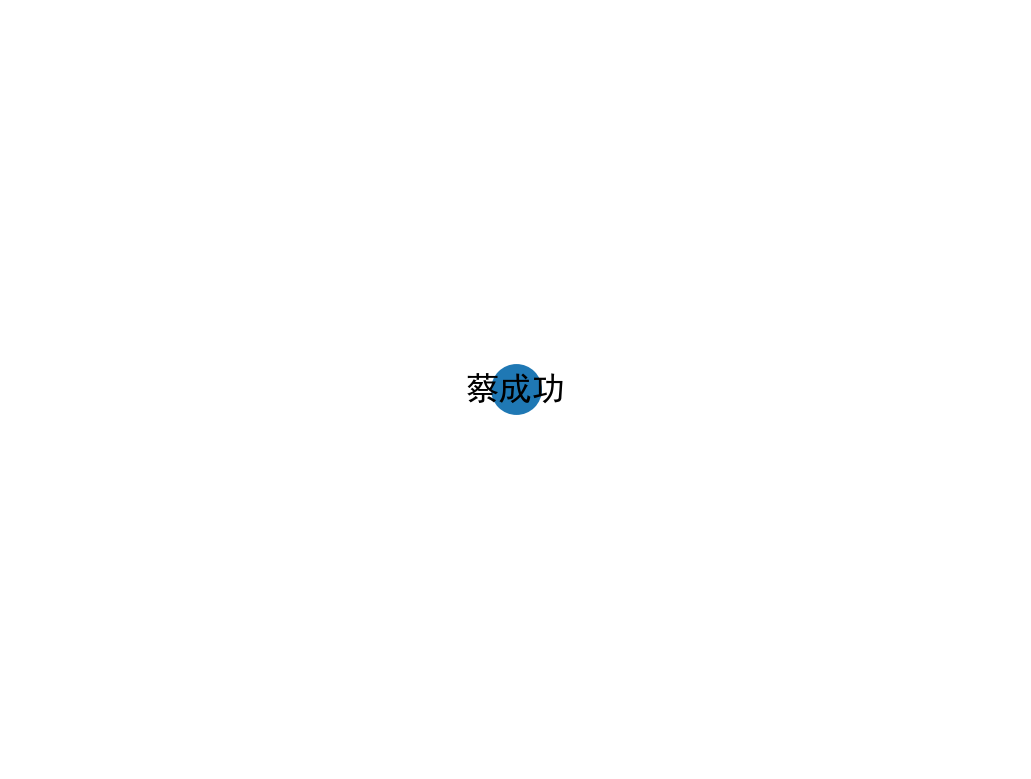

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

if not os.path.exists('SimHei.ttf'):
    # SimHei
    !wget -O SimHei.ttf "https://github.com/StellarCN/scp_zh/raw/master/fonts/SimHei.ttf"

fm.fontManager.addfont('SimHei.ttf')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 200

G = nx.Graph()
G.add_node("蔡成功")

nx.draw_networkx(G)
plt.axis("off")
plt.show()

Now there is only one node in the graph, you are supposed to add all other characters, as nodes, to the graph. It will be very troublesome for typing all the names. You can use the for-loop to make this step easier. The steps can be:
1. convert the two columns of the `data` dataframe into two lists.
2. concatenate/combine the two lists (hint: using listA+listB)
3. remove duplicate items (we have tried this in the first exercise, but you can google it).
4. remove "蔡成功" from the list as we have already added this node to the graph.
5. use for-loop to iteratively add nodes to the graph.

Use below code cell to finish this step <span style="background-color: #FFFF00">(**2 Points**)</span>

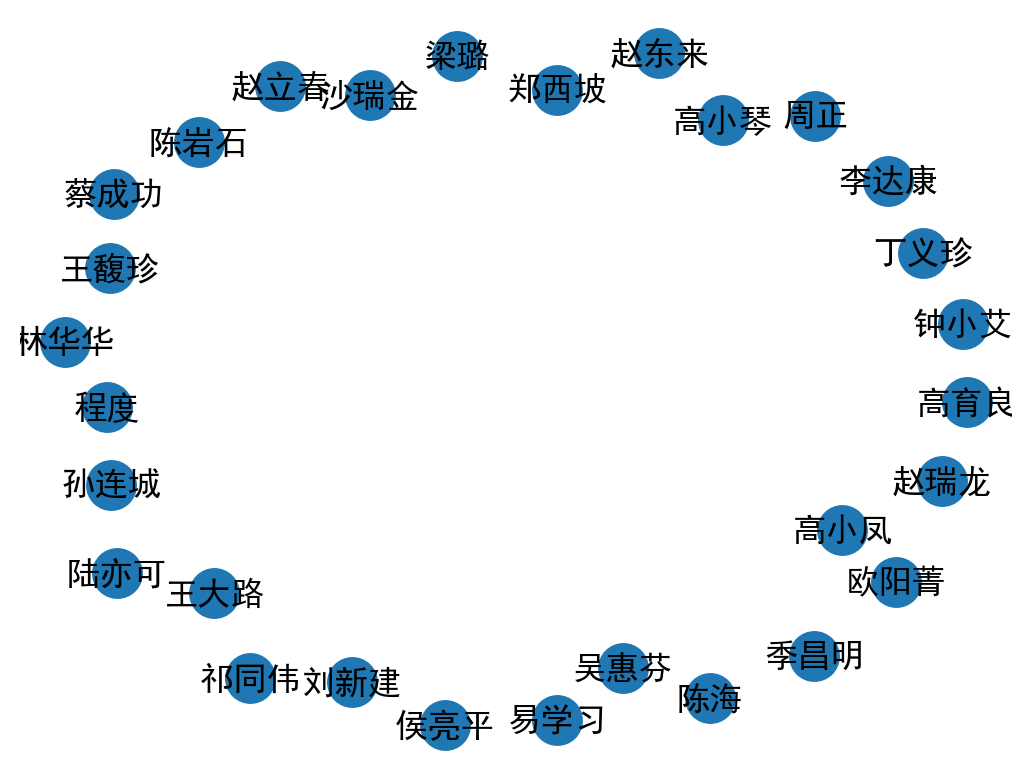

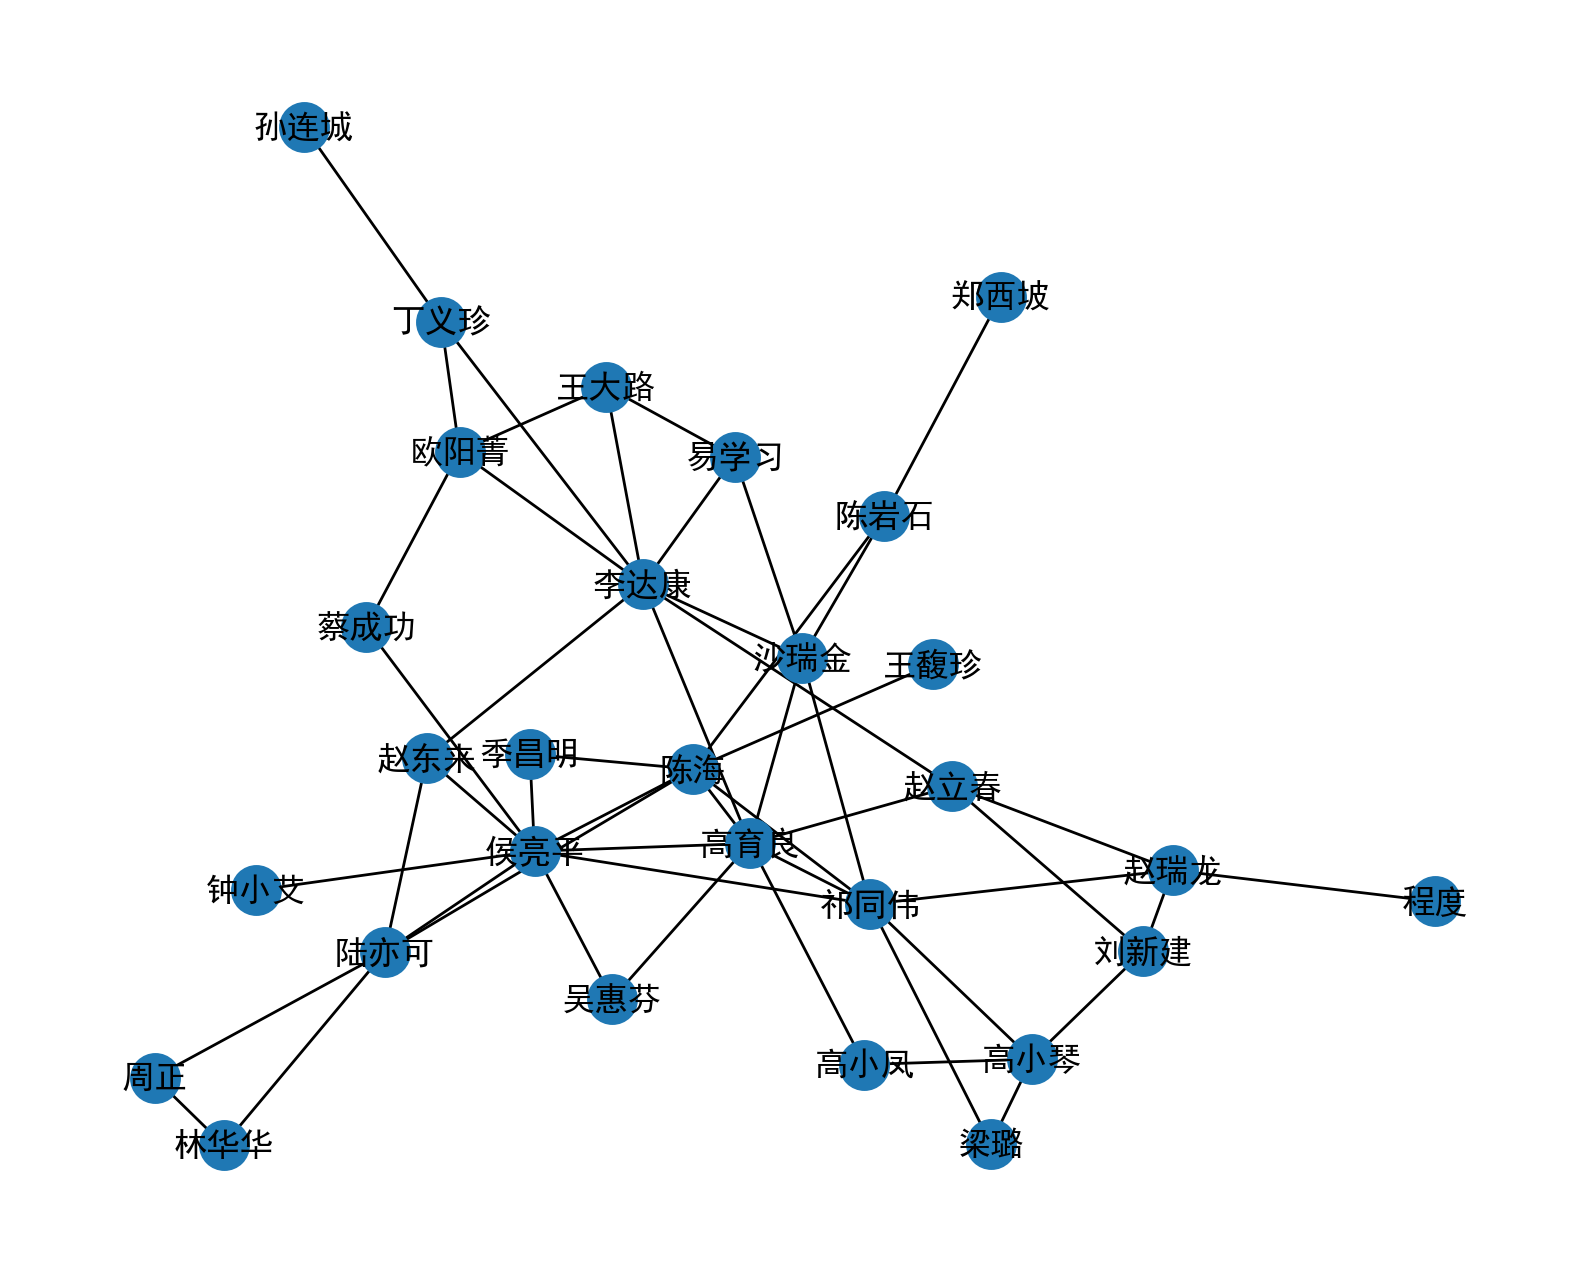

In [6]:
data = pd.read_csv('data.csv')

list_A = data['人员A'].tolist()
list_B = data['人员B'].tolist()

all_names = list_A + list_B

unique_names = list(set(all_names))

if "蔡成功" in unique_names:
    unique_names.remove("蔡成功")

for name in unique_names:
    G.add_node(name)

nx.draw_networkx(G)
plt.axis("off")
plt.show()

for index, row in data.iterrows():
    G.add_edge(row['人员A'], row['人员B'])

plt.figure(figsize=(10, 8))

nx.draw_networkx(G)
plt.axis("off")
plt.show()

Now the graph includes the set of nodes, but does not include the "edges" measuring the relations among nodes. Below I will show how to add the edge for the first line of the `data`, that is:
```
蔡成功 - 贿赂 - 欧阳菁.
```

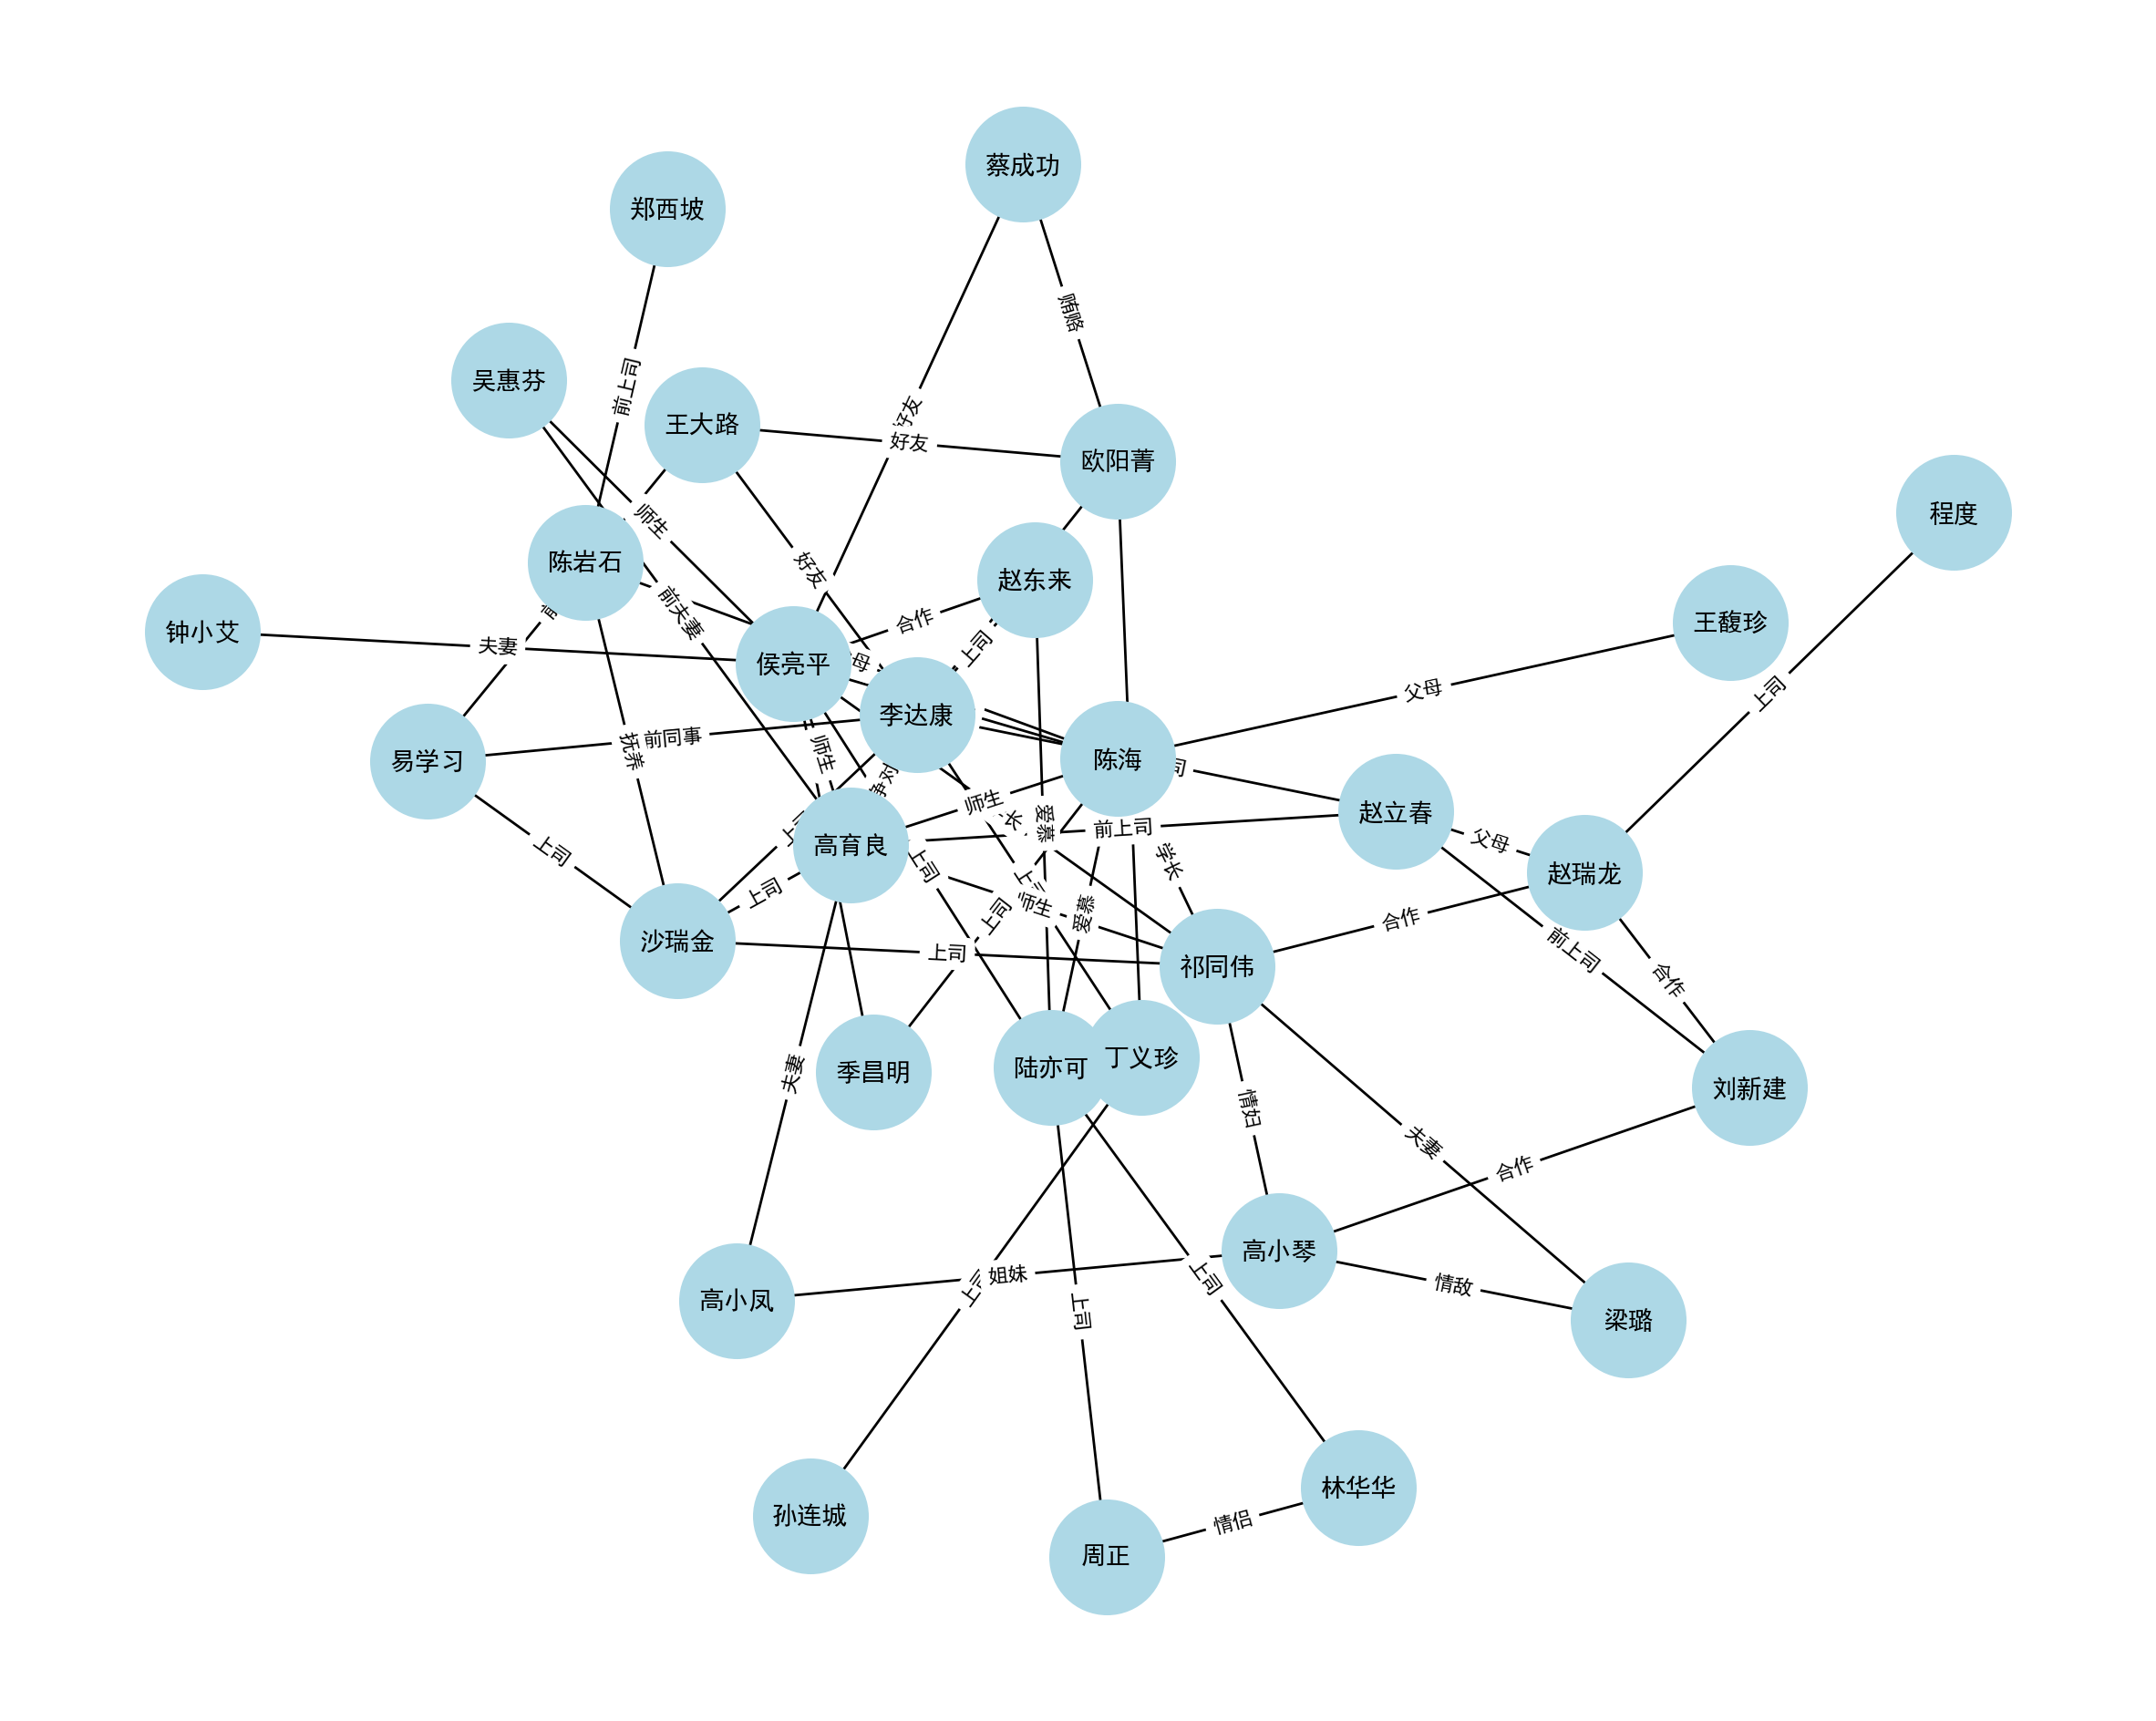

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# data = pd.read_csv('data.csv')

G = nx.Graph()

for index, row in data.iterrows():

    G.add_edge(row['人员A'], row['人员B'], relation=row['关系'])

plt.figure(figsize=(15, 12))

pos = nx.spring_layout(G, k=0.8, seed=42)

nx.draw_networkx(G, pos,
                 node_size=2000,
                 node_color='lightblue',
                 font_size=10,
                 font_family='SimHei')

relation_labels = nx.get_edge_attributes(G, 'relation')

nx.draw_networkx_edge_labels(G, pos,
                             edge_labels=relation_labels,
                             font_family='SimHei',
                             font_size=8)

plt.axis("off")
plt.show()

Following the above example. Add other edges shown in above code cell. Similarly, you can use for-loop to iterate the rows in `data` dataframe <span style="background-color: #FFFF00">(**2 Points**)</span>.

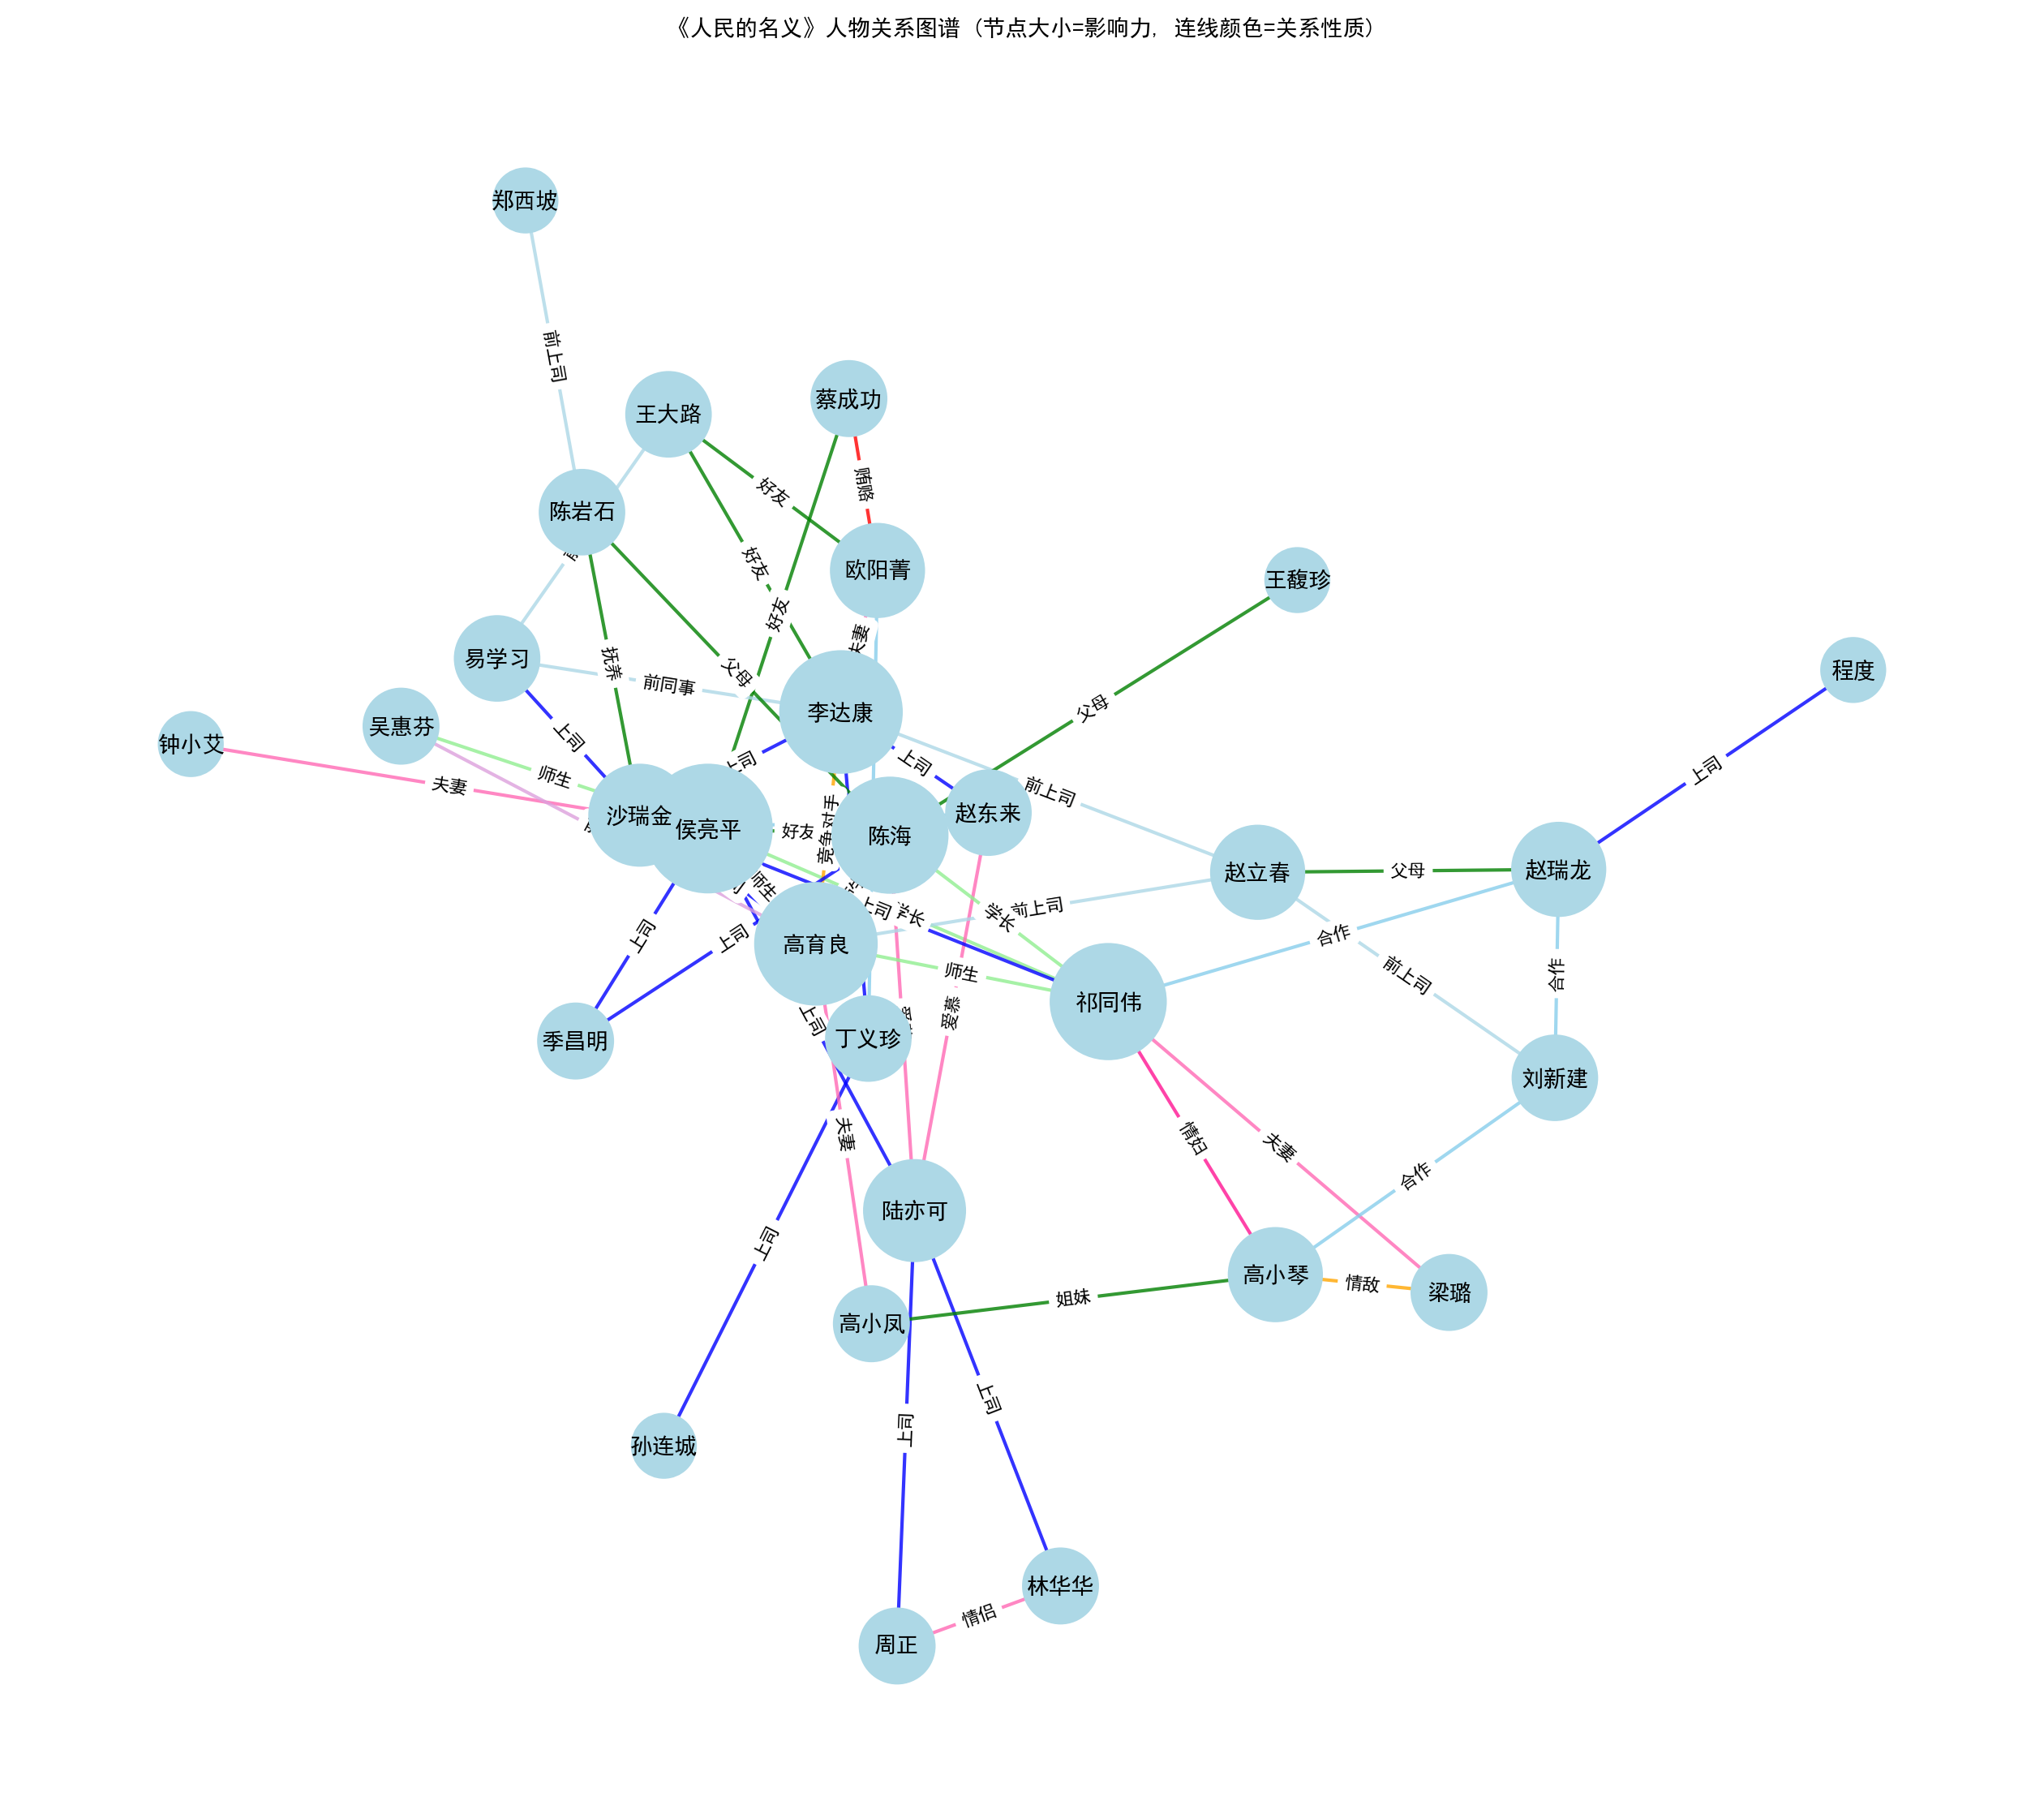

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

relation_colors = {
    '贿赂': 'red',       # 红色代表危险/腐败
    '竞争对手': 'orange',
    '情敌': 'orange',

    '夫妻': '#ff69b4',   # 粉色代表亲密关系
    '爱慕': '#ff69b4',
    '情侣': '#ff69b4',
    '情妇': '#ff1493',   # 深粉色
    '前夫妻': '#dda0dd',

    '好友': 'green',     # 绿色代表友好/家庭
    '姐妹': 'green',
    '父母': 'green',
    '抚养': 'green',
    '师生': 'lightgreen',
    '学长': 'lightgreen',

    '合作': 'skyblue',   # 蓝色代表工作关系
    '上司': 'blue',
    '前同事': 'lightblue',
    '前上司': 'lightblue'
}
# 默认颜色（防止有漏网之鱼）
default_color = 'gray'

G = nx.Graph()
for index, row in data.iterrows():
    # 获取该关系的颜色，如果字典里没有就用默认灰色
    color = relation_colors.get(row['关系'], default_color)
    G.add_edge(row['人员A'], row['人员B'], relation=row['关系'], color=color)

degrees = dict(G.degree())
node_sizes = [degrees[n] * 300 + 500 for n in G.nodes()]

plt.figure(figsize=(16, 14))

pos = nx.spring_layout(G, k=0.6, seed=42)

edge_colors = [G[u][v]['color'] for u, v in G.edges()]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightblue')

nx.draw_networkx_edges(G, pos, edge_color=edge_colors, width=1.5, alpha=0.8)

nx.draw_networkx_labels(G, pos, font_size=10, font_family='SimHei')

edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_family='SimHei')

plt.title("《人民的名义》人物关系图谱 (节点大小=影响力, 连线颜色=关系性质)", fontsize=15, fontproperties='SimHei')
plt.axis("off")
plt.show()

### Step 2: Check the adjacency matrix of the network.

In the lecture session, we have learnt the concept of adjacency matrix that store the connectedness information among nodes. You can check the adjancy matrix as Numpy Array using the `nx.adjacency_matrix`[https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html] function.

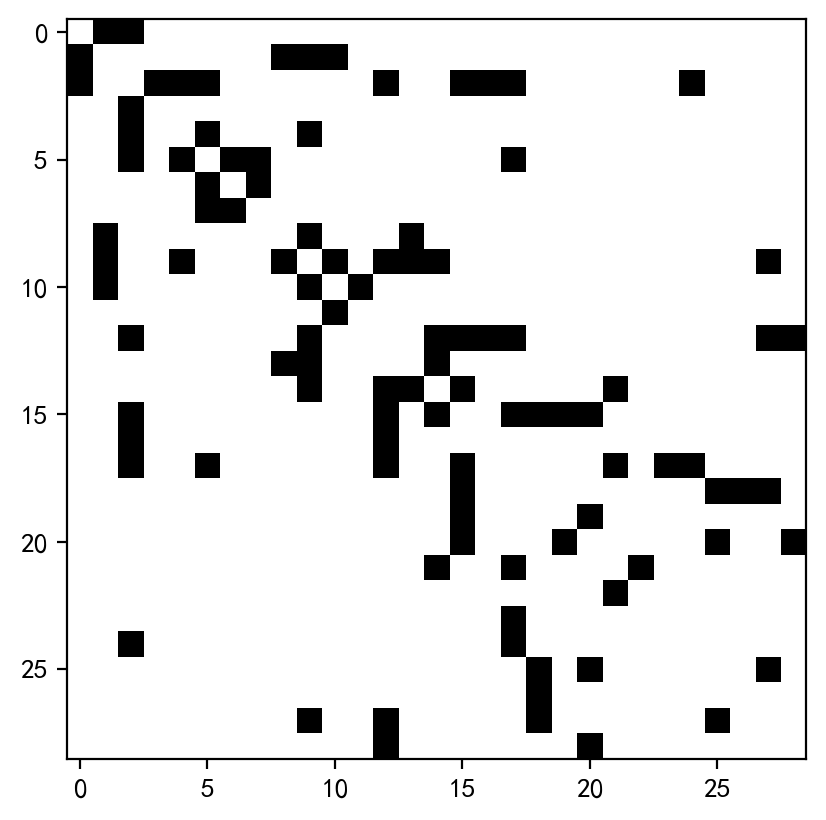

In [9]:
plt.imshow(nx.adjacency_matrix(G).toarray(), cmap='Greys')

### Step 3: Visualize the network

In below code cell, you can try other visualization styles of the network. Kindly run the below code cell to see the effect, then make any revision to the parameters and adjust the style including the ones specified in "options" or the position style <span style="background-color: #FFFF00">(**2 Points**)</span>.


Networkx has different position styles for selection.
- spring layout: [nx.spring_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html)
- circular layout: [nx.circular_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.circular_layout.html)
- Kamada-Kawai layout: [nx.kamada_kawai_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.kamada_kawai_layout.html)
- Spectral layout: [nx.spectral_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spectral_layout.html)
- Spiral layout: [nx.spiral_layout()](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spiral_layout.html)
- Fruchterman-Reingold layout: [nx.fruchterman_reingold_layout()](https://networkx.org/documentation/networkx-1.11/reference/generated/networkx.drawing.layout.fruchterman_reingold_layout.html)

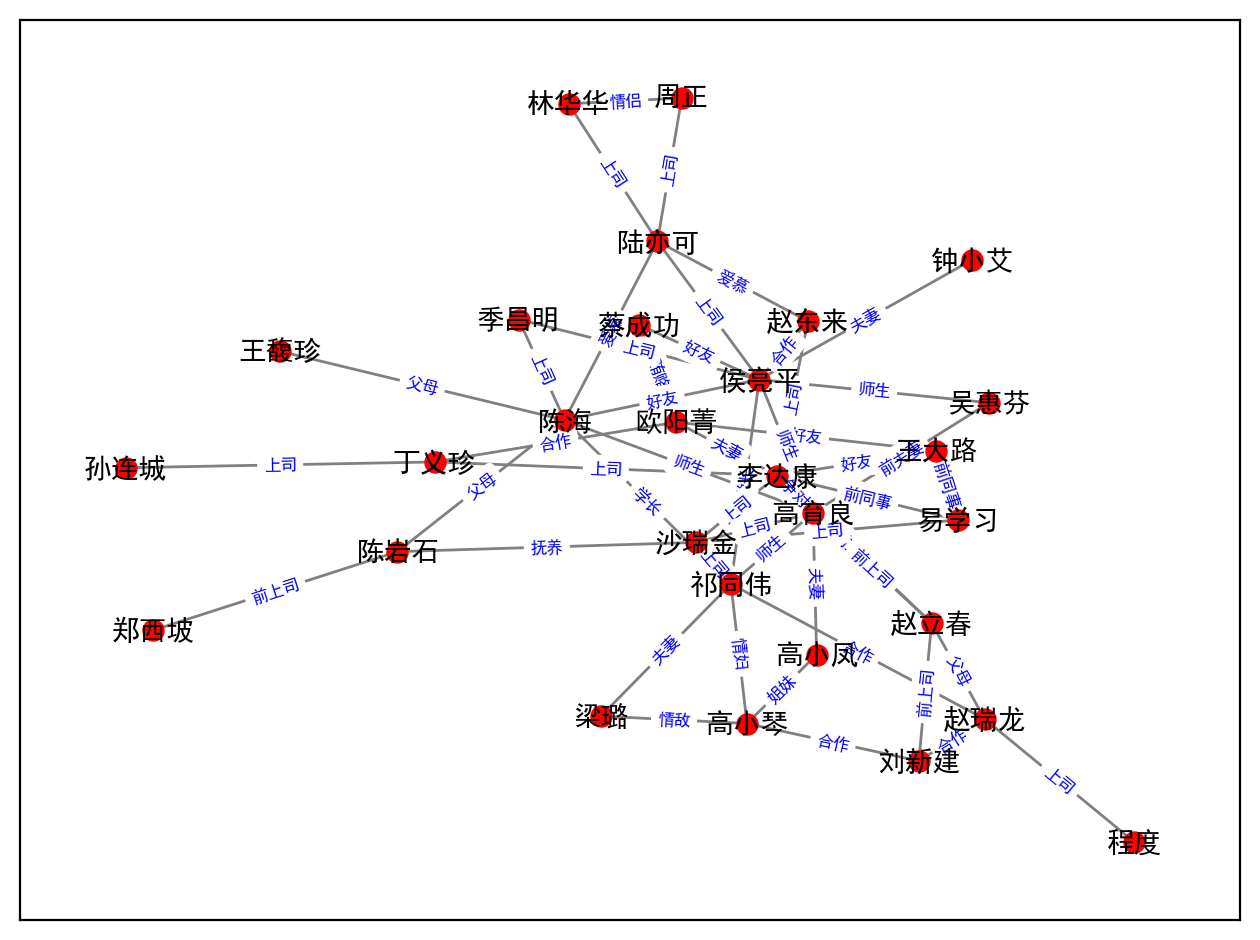

In [11]:
import numpy as np
import matplotlib as mpl

options = {
    "node_color": "Red",# the color of the node
    "node_shape": 'o', # the symbol style of the node
    "width": 1, # the width of the edge.
    "node_size":50, # the size of the node
    "font_size": 10, # the font size for node labels
    "edge_color": "gray" # this will assign different color to edges according to edge weight
}

pos =  nx.spring_layout(G) # the position style of the graph

nx.draw_networkx(G, pos, **options)

edge_labels = nx.draw_networkx_edge_labels(G,
                                           pos,
                                           edge_labels = nx.get_edge_attributes(G, name = "relation"), # the edge labels as a dict
                                           font_size=6, # the font size of the edge labels
                                           font_color = "b" # the font color of the edge labels
                                          )

plt.tight_layout()

### Step 4: Explore the network

After obtaining the graph, networkX provides a wide array of functions allowing you to examine the graph. Please read this [tutorial](https://networkx.org/documentation/stable/tutorial.html) and find answers by completing below code cell <span style="background-color: #FFFF00">(**2 points**)</span>.

In [12]:
# 1. query the total number of nodes in this network
num_nodes = G.number_of_nodes()
print(f"节点总数: {num_nodes}")


# 2. query the total number of edges in this network
num_edges = G.number_of_edges()
print(f"边总数: {num_edges}")


# 3. the relation between 沙瑞金 and 李达康
relation = G['沙瑞金']['李达康']['relation']
print(f"沙瑞金和李达康的关系: {relation}")


# 4. who is acquainted with 侯亮平
hou_acquaintances = list(G.neighbors('侯亮平'))
print(f"侯亮平认识的人: {hou_acquaintances}")

节点总数: 29
边总数: 51
沙瑞金和李达康的关系: 上司
侯亮平认识的人: ['蔡成功', '钟小艾', '赵东来', '高育良', '吴惠芬', '陈海', '陆亦可', '祁同伟', '季昌明']


## Network Metrics

### 1. Network Connectedness

In the lecture, we have talked about the different methods for measuring the connectivity of the network.
- The simplest one is [**density**](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.density.html). The denser a network, the more connected it is.

- [**shortest_path**](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path.html#networkx.algorithms.shortest_paths.generic.shortest_path) returns the shortest path connecting two nodes.

- [**diameter**](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.distance_measures.diameter.html), measures the largest value of the shortest path for all node pairs.

Below show examples of these three functions.

In [13]:
# density of the network
net_den = nx.density(G)
print("The density of the network is:", net_den)


hou_chen_shortest = nx.shortest_path(G, "陈岩石", "赵瑞龙")
hou_chen_shortest_len = nx.shortest_path_length(G, "陈岩石", "赵瑞龙")


print("The shortest path between 陈岩石 and 赵瑞龙 is:", hou_chen_shortest)
print("The shortest path length between 陈岩石 and 赵瑞龙 is:", hou_chen_shortest_len)


net_diameter = nx.diameter(G)
print("the diameter of the network is:", net_diameter)

The density of the network is: 0.12561576354679804
The shortest path between 陈岩石 and 赵瑞龙 is: ['陈岩石', '陈海', '祁同伟', '赵瑞龙']
The shortest path length between 陈岩石 and 赵瑞龙 is: 3
the diameter of the network is: 5


### 2. Centrality Measures

The centrality measures the importance of individual nodes on the network. There are different types of centrality measure:

1. degree centrality: [`degree_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality), calculated as the degree (number of connected nodes) of a node divided by n-1, where n is the total number of nodes. The higher the degree centrality of a node, the more connection of this node to other nodes.


2. betweenness centrality: [`betweenness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality), calculated as the sum of the fraction of all-pairs shortest paths that pass through a node. The higher the betweenness centrality of a node, the more frequent for this node to be reached when visiting other nodes.


3. closeness centrality: [`closeness_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html), calculated as the reciprocal of the average shortest path distance to u over all n-1 reachable nodes. The higher the closeness centrality of a node, the easier (closer) of this node to be reached by other nodes.


4. eigenvector centrality: [`eigenvector_centrality`](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality), calculated by summing the centrality of its neighbors (predecessors in the case of directional graph). The higher eigenvector centrality of a node, the more influential neighbors this node has.

In [14]:
print(nx.betweenness_centrality(G)) # the output is a dictionary

{'蔡成功': 0.02544091710758377, '欧阳菁': 0.026014109347442676, '侯亮平': 0.23999748047367092, '钟小艾': 0.0, '赵东来': 0.0612087427563618, '陆亦可': 0.14197530864197527, '林华华': 0.0, '周正': 0.0, '王大路': 0.0026455026455026454, '李达康': 0.26659423028470647, '丁义珍': 0.07142857142857142, '孙连城': 0.0, '高育良': 0.20316200554295794, '易学习': 0.006261022927689595, '沙瑞金': 0.09995905769715292, '祁同伟': 0.22144746787603928, '吴惠芬': 0.0, '陈海': 0.19751196775006297, '赵瑞龙': 0.08446712018140588, '梁璐': 0.0, '高小琴': 0.023620559334845043, '陈岩石': 0.07669753086419753, '郑西坡': 0.0, '王馥珍': 0.0, '季昌明': 0.0, '刘新建': 0.010537918871252203, '程度': 0.0, '赵立春': 0.07705341395817587, '高小凤': 0.005246913580246913}


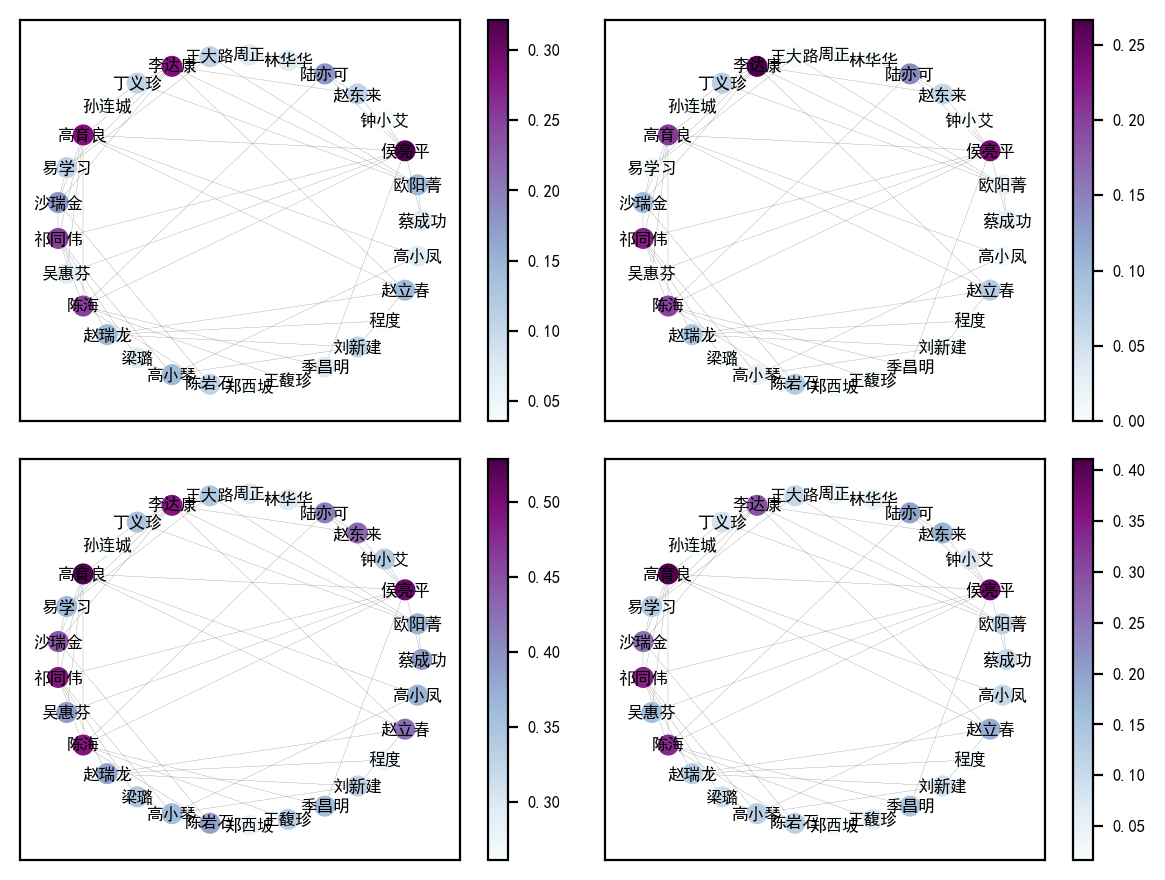

In [16]:
degree_centrality = list(nx.degree_centrality(G).values())  # convert the dictionary output to list.
betweenness_centrality = list(nx.betweenness_centrality(G).values())
closeness_centrality = list(nx.closeness_centrality(G).values())
eigenvector_centrality = list(nx.eigenvector_centrality(G).values())


options = {
    "arrows": False,
    "with_labels": True,
    "cmap": plt.cm.BuPu,
    "node_shape": 'o',
    "linewidths": 0.5,
    "width": 0.1,
    "node_size":50,
    "font_size": 6,
    "edge_color":'grey' # this will assign different color to edges according to edge weight
}


fig, axs = plt.subplots(2, 2, figsize=(6, 4.5))

nx.draw_networkx(G,
                 pos = nx.circular_layout(G),
                 node_color = degree_centrality,
                 ax = axs[0,0],
                 **options)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.BuPu, norm=plt.Normalize(vmin=min(degree_centrality), vmax=max(degree_centrality))),
             ax = axs[0, 0])
cbar.ax.tick_params(labelsize=6)


nx.draw_networkx(G,
                 pos = nx.circular_layout(G),
                 node_color = betweenness_centrality,
                 ax = axs[0,1],
                 **options)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.BuPu, norm=plt.Normalize(vmin=min(betweenness_centrality), vmax=max(betweenness_centrality))),
             ax = axs[0, 1])
cbar.ax.tick_params(labelsize=6)


nx.draw_networkx(G,
                 pos = nx.circular_layout(G),
                 node_color = closeness_centrality,
                 ax = axs[1,0],
                 **options)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.BuPu, norm=plt.Normalize(vmin=min(closeness_centrality), vmax=max(closeness_centrality))),
             ax = axs[1, 0])
cbar.ax.tick_params(labelsize=6)


nx.draw_networkx(G,
                 pos = nx.circular_layout(G),
                 node_color = eigenvector_centrality,
                 ax = axs[1,1],
                 **options)

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.BuPu, norm=plt.Normalize(vmin=min(eigenvector_centrality), vmax=max(eigenvector_centrality))),
             ax = axs[1, 1])
cbar.ax.tick_params(labelsize=6)


plt.tight_layout()

Please document your findings from the resulting figure <span style="background-color: #FFFF00">(**2 Points**)</span>

--------------
The figure presents a comparative visualization of four centrality measures: Degree, Betweenness, Closeness, and Eigenvector centrality. The nodes are arranged in a circular layout, with color intensity (purple scale) indicating the magnitude of each centrality score.

**Identification of Key Hubs:** Across all four subplots, a few specific nodes
appear significantly darker than others. This indicates that characters like Hou Liangping and Gao Yuliang are central figures in the network. They not only have the highest number of direct connections (Degree Centrality) but also play crucial roles in bridging different groups (Betweenness Centrality).

**Correlation of Metrics:** There is a visual consistency between Degree Centrality and Eigenvector Centrality. The nodes that are highly connected also tend to be connected to other influential nodes, reinforcing their status within the social structure.

**Peripheral Nodes:** The majority of nodes appear in lighter colors, suggesting that the network relies heavily on a few key "hubs" to maintain connectivity, while most characters have relatively low influence and fewer connections.

--------------

## Network Analysis Algorithms

### 1. Community Detection

In the lecture, we have talked about the different the different [community detection algorithms](https://networkx.org/documentation/stable/reference/algorithms/community.html) including:
- [Kernighan-Lin](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kernighan_lin.kernighan_lin_bisection.html): partition a network into two groups.

- [k-clique communities](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.kclique.k_clique_communities.html#networkx.algorithms.community.kclique.k_clique_communities): find k-clique communities in the network.

- [Girvan-Newman](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#networkx.algorithms.community.centrality.girvan_newman): detect communities by progressively removing edges from the original graph.

- [Louvain algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities): Louvain algorithm: extract the community structure of a network based on modularity optimization.


In below code cell, try the different community detection methods one by one

({'陈岩石', '周正', '陈海', '钟小艾', '郑西坡', '吴惠芬', '蔡成功', '林华华', '侯亮平', '孙连城', '赵东来', '季昌明', '陆亦可', '王馥珍'}, {'李达康', '梁璐', '高小琴', '祁同伟', '刘新建', '王大路', '程度', '高小凤', '沙瑞金', '易学习', '赵立春', '赵瑞龙', '高育良', '欧阳菁', '丁义珍'})


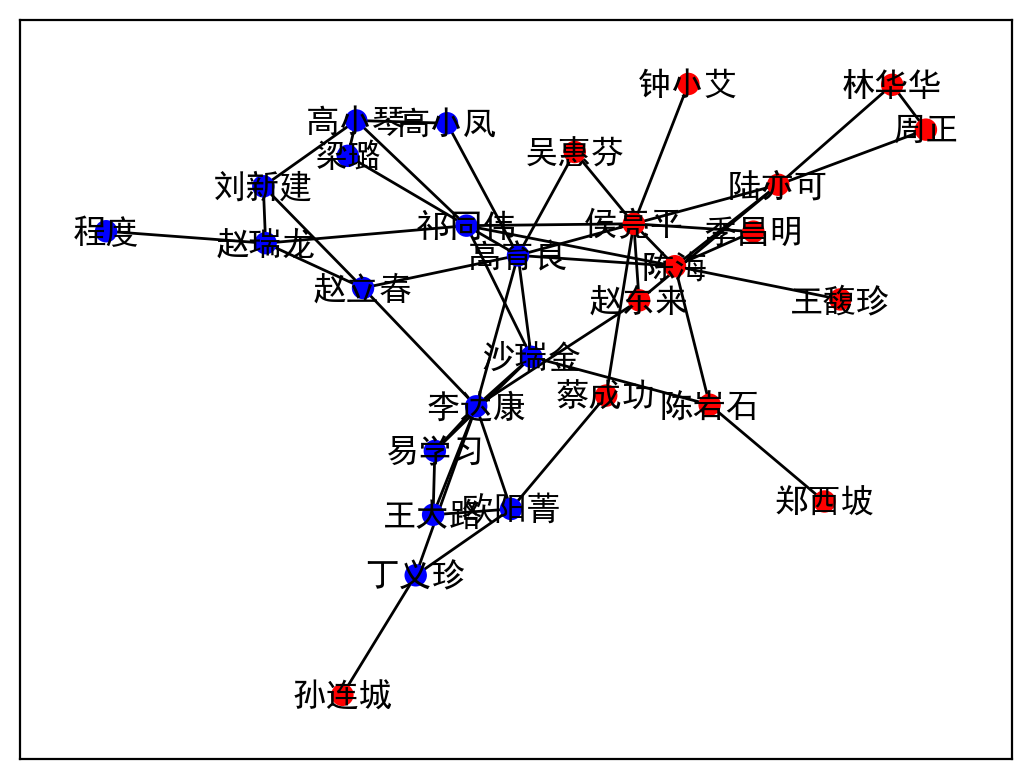

In [17]:
# Kernighan-Lin bi-parition.

communities = nx.community.kernighan_lin_bisection(G)
print(communities) # the output is a tuple including two sets, with each set including nodes for that community.


# below is just for visualization, nodes in the same color suggest they are of the same community.

node_color = ['red' if node[0] in communities[0] else 'blue' for node in G.nodes(data=True)]

nx.draw_networkx(G, node_color=node_color, node_size=50)

[frozenset({'赵立春', '赵瑞龙', '刘新建'}), frozenset({'李达康', '祁同伟', '陈海', '王大路', '吴惠芬', '沙瑞金', '易学习', '赵立春', '高育良', '侯亮平', '欧阳菁', '赵东来', '季昌明', '陆亦可', '丁义珍'}), frozenset({'林华华', '周正', '陆亦可'}), frozenset({'梁璐', '高小琴', '祁同伟'})]


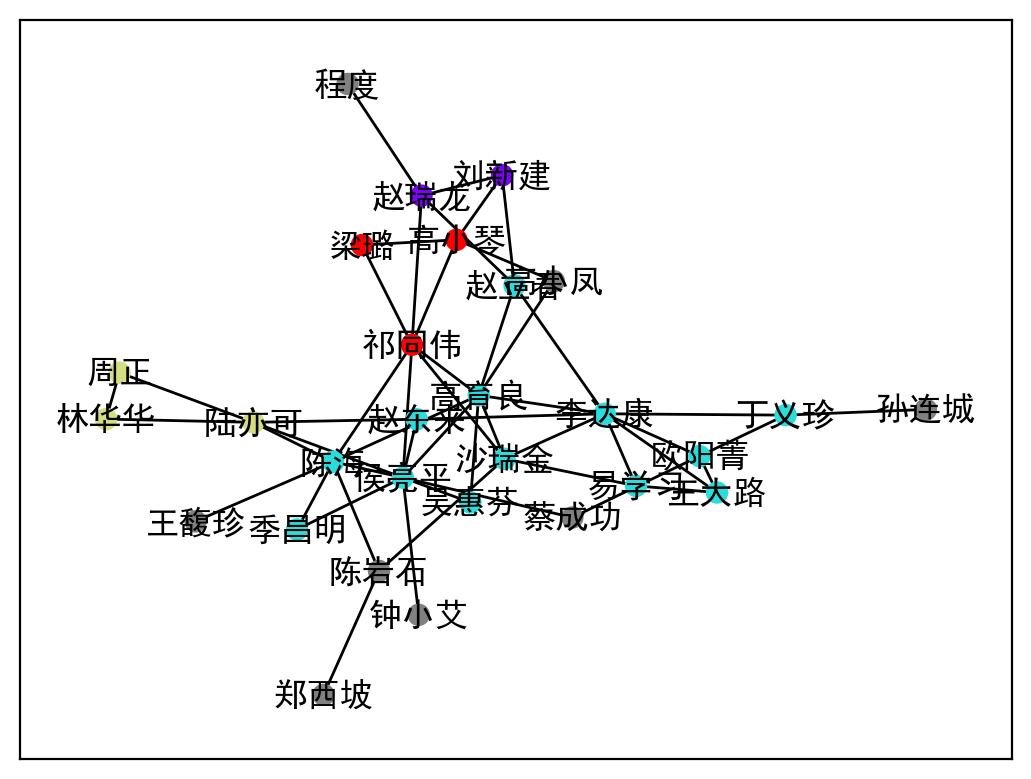

In [18]:
# k-clique community detection

communities = list(nx.community.k_clique_communities(G, k=3))
print(communities)


# below is just for visualization, nodes in the same color suggest they are of the same community.
community_colors = {}
color_map = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
for i, community in enumerate(communities):
    for node in community:
        community_colors[node] = color_map[i]


nx.draw_networkx(G,
                 node_color=[community_colors[node[0]]
                             if node[0] in list(community_colors.keys())
                             else 'grey' for node in G.nodes(data=True)],
                 node_size=50)

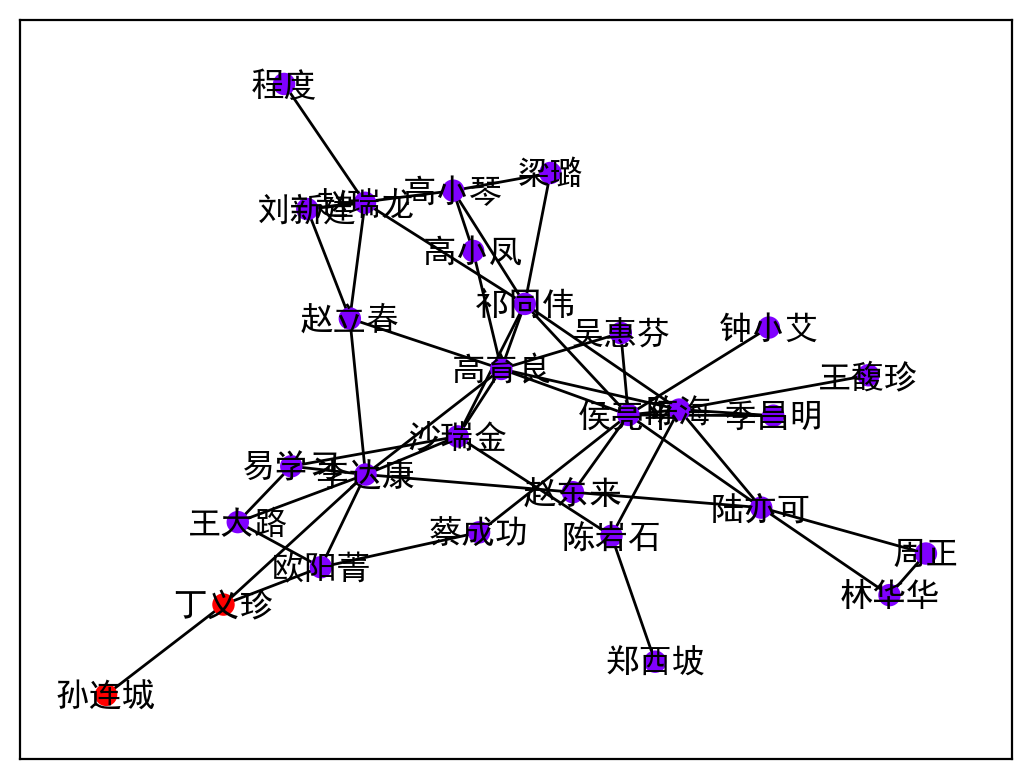

In [19]:
# Girvan-Newman community detection

communities = list(nx.community.girvan_newman(G))
# print(communities)

# below is just for visualization, nodes in the same color suggest they are of the same community.
community_colors = {}
color_map = plt.cm.rainbow(np.linspace(0, 1, len(communities[0])))
for i, community in enumerate(communities[0]):
    for node in community:
        community_colors[node] = color_map[i]

nx.draw_networkx(G,
                 node_color=[community_colors[node[0]]
                             if node[0] in list(community_colors.keys())
                             else 'grey' for node in G.nodes(data=True)],
                 node_size=50)

[{'周正', '陈海', '钟小艾', '林华华', '侯亮平', '陆亦可', '赵东来', '季昌明', '蔡成功', '王馥珍'}, {'沙瑞金', '李达康', '易学习', '王大路', '欧阳菁', '孙连城', '丁义珍'}, {'高小琴', '祁同伟', '刘新建', '程度', '吴惠芬', '高小凤', '赵立春', '赵瑞龙', '高育良', '梁璐'}, {'郑西坡', '陈岩石'}]


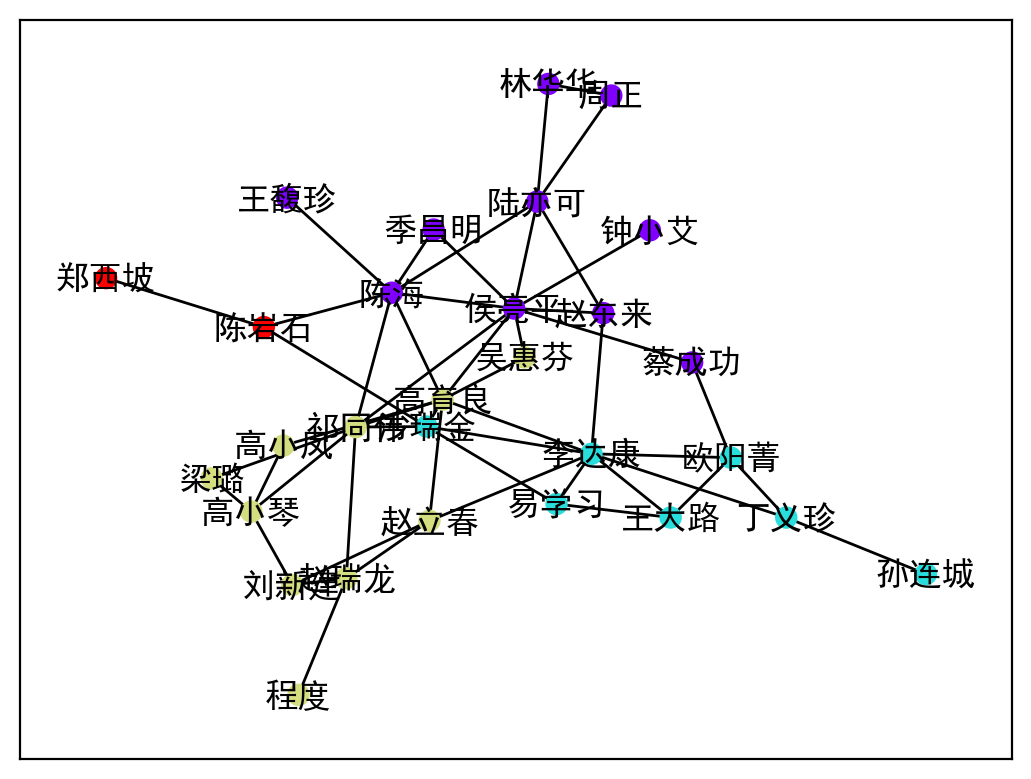

In [20]:
# Louvain community detection

communities = nx.community.louvain_communities(G, seed=0)
print(communities)


# below is just for visualization, nodes in the same color suggest they are of the same community.
community_colors = {}
color_map = plt.cm.rainbow(np.linspace(0, 1, len(communities)))
for i, community in enumerate(communities):
    for node in community:
        community_colors[node] = color_map[i]

nx.draw_networkx(G,
                 node_color=[community_colors[node[0]]
                             if node[0] in list(community_colors.keys())
                             else 'grey' for node in G.nodes(data=True)],
                 node_size=50)

### 2. Link Prediction

Use the below code cell to try the different link prediction algorithms introduced in the lecture session.

In [23]:
import networkx as nx

# 主要尝试两种算法: Jaccard 和 Adamic-Adar

# 算法 1: Jaccard Coefficient
print("基于 Jaccard 系数预测的前5名潜在关系")

preds_jaccard = nx.jaccard_coefficient(G)

top_jaccard = sorted(preds_jaccard, key=lambda x: x[2], reverse=True)[:5]

for u, v, p in top_jaccard:
    print(f"[{u}] 和 [{v}] 可能认识 (分数: {p:.4f})")


print("\n" + "-"*40 + "\n")


# 算法 2: Adamic-Adar Index
print("基于 Adamic-Adar 指标预测的前5名潜在关系")
preds_aa = nx.adamic_adar_index(G)

top_aa = sorted(preds_aa, key=lambda x: x[2], reverse=True)[:5]

for u, v, p in top_aa:
    print(f"[{u}] 和 [{v}] 可能认识 (分数: {p:.4f})")

基于 Jaccard 系数预测的前5名潜在关系
[季昌明] 和 [钟小艾] 可能认识 (分数: 0.5000)
[季昌明] 和 [王馥珍] 可能认识 (分数: 0.5000)
[王大路] 和 [丁义珍] 可能认识 (分数: 0.5000)
[钟小艾] 和 [吴惠芬] 可能认识 (分数: 0.5000)
[钟小艾] 和 [蔡成功] 可能认识 (分数: 0.5000)

----------------------------------------

基于 Adamic-Adar 指标预测的前5名潜在关系
[高育良] 和 [高小琴] 可能认识 (分数: 1.9566)
[陈海] 和 [沙瑞金] 可能认识 (分数: 1.9050)
[刘新建] 和 [祁同伟] 可能认识 (分数: 1.4427)
[侯亮平] 和 [欧阳菁] 可能认识 (分数: 1.4427)
[赵瑞龙] 和 [高小琴] 可能认识 (分数: 1.4241)


### 3. Structural Hole Analysis

NetworkX provides three functions for structural hole analysis. You can check this [page](https://networkx.org/documentation/stable/reference/algorithms/structuralholes.html) and explore the functions. Calculate the effective sizes and constraints for all nodes and then identify the "brokers" in the constructed social networks.

In [21]:
print(nx.effective_size(G))
print("\t")

print(nx.constraint(G))

{'蔡成功': 2.0, '欧阳菁': 3.0, '侯亮平': 7.444444444444445, '钟小艾': 1.0, '赵东来': 2.3333333333333335, '陆亦可': 3.8, '林华华': 1.0, '周正': 1.0, '王大路': 1.6666666666666667, '李达康': 6.5, '丁义珍': 2.3333333333333335, '孙连城': 1.0, '高育良': 6.25, '易学习': 1.6666666666666667, '沙瑞金': 3.8, '祁同伟': 5.571428571428571, '吴惠芬': 1.0, '陈海': 5.571428571428571, '赵瑞龙': 3.5, '梁璐': 1.0, '高小琴': 3.5, '陈岩石': 3.0, '郑西坡': 1.0, '王馥珍': 1.0, '季昌明': 1.0, '刘新建': 2.3333333333333335, '程度': 1.0, '赵立春': 3.0, '高小凤': 2.0}
	
{'蔡成功': 0.5, '欧阳菁': 0.39431423611111105, '侯亮平': 0.20814302161193696, '钟小艾': 1.0, '赵东来': 0.4082853223593964, '陆亦可': 0.3659309649785841, '林华华': 0.9225, '周正': 0.9225, '王大路': 0.5597993827160492, '李达康': 0.2452061631944444, '丁义珍': 0.4253472222222222, '孙连城': 1.0, '高育良': 0.2200842220568783, '易学习': 0.5424845679012344, '沙瑞金': 0.29061791383219954, '祁同伟': 0.23117512443374927, '吴惠芬': 0.625048225308642, '陈海': 0.23351029792113367, '赵瑞龙': 0.3337673611111111, '梁璐': 0.7171556122448979, '高小琴': 0.34725765306122447, '陈岩石': 0.3333333333333333, '郑西坡': 

### 4. Node Classification

Use the below code cell to try the different node classification algorithms introduced in the lecture session.

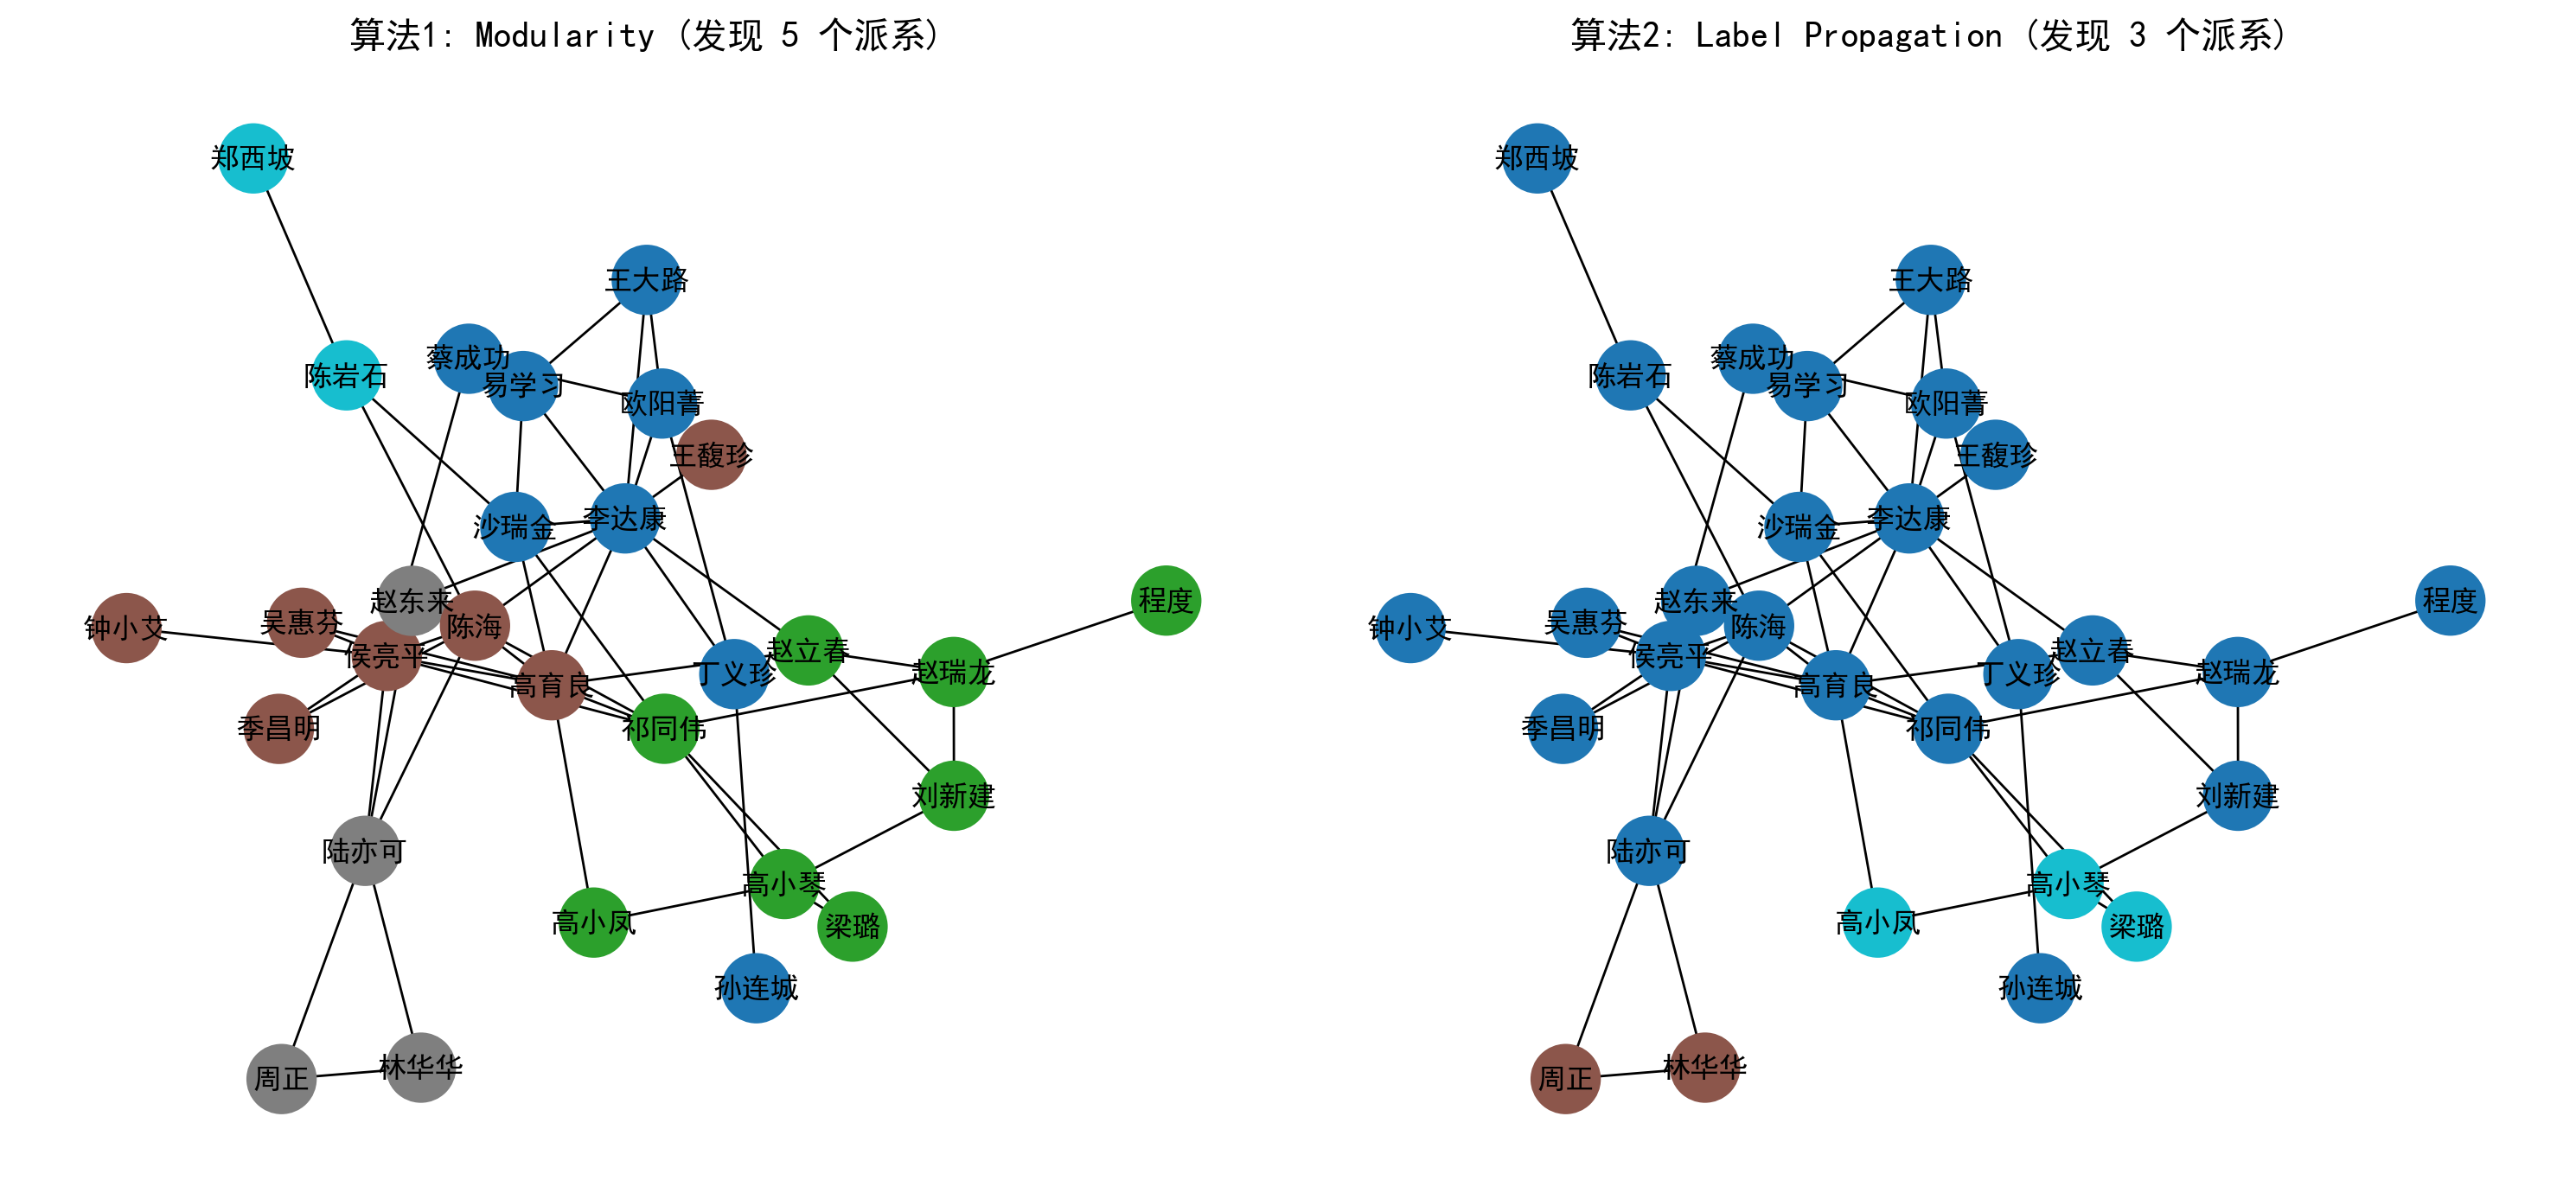

=== 基于 Modularity 发现的主要派系名单 ===
派系 1: ['李达康', '王大路', '沙瑞金', '欧阳菁', '易学习', '孙连城', '蔡成功', '丁义珍']
派系 2: ['高小琴', '祁同伟', '刘新建', '程度', '高小凤', '赵立春', '赵瑞龙', '梁璐']
派系 3: ['侯亮平', '陈海', '高育良', '钟小艾', '吴惠芬', '季昌明', '王馥珍']
派系 4: ['林华华', '赵东来', '周正', '陆亦可']


In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# 算法 1: Greedy Modularity (基于模块度的社群发现)
communities_modularity = list(community.greedy_modularity_communities(G))

group_map_mod = {}
for i, comm in enumerate(communities_modularity):
    for node in comm:
        group_map_mod[node] = i

colors_mod = [group_map_mod.get(node) for node in G.nodes()]


# 算法 2: Label Propagation (标签传播算法)
communities_lp = list(community.label_propagation_communities(G))

group_map_lp = {}
for i, comm in enumerate(communities_lp):
    for node in comm:
        group_map_lp[node] = i

colors_lp = [group_map_lp.get(node) for node in G.nodes()]


plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
pos = nx.spring_layout(G, k=0.5, seed=42)
nx.draw_networkx(G, pos,
                 node_color=colors_mod,
                 cmap=plt.cm.tab10,
                 with_labels=True,
                 font_family='SimHei',
                 node_size=800)
plt.title(f"算法1: Modularity (发现 {len(communities_modularity)} 个派系)", fontproperties='SimHei', fontsize=15)
plt.axis('off')

plt.subplot(1, 2, 2)
nx.draw_networkx(G, pos,
                 node_color=colors_lp,
                 cmap=plt.cm.tab10,
                 with_labels=True,
                 font_family='SimHei',
                 node_size=800)
plt.title(f"算法2: Label Propagation (发现 {len(communities_lp)} 个派系)", fontproperties='SimHei', fontsize=15)
plt.axis('off')

plt.tight_layout()
plt.show()

print("=== 基于 Modularity 发现的主要派系名单 ===")
for i, comm in enumerate(communities_modularity):
    if len(comm) > 3: # 只打印超过3人的大帮派
        print(f"派系 {i+1}: {list(comm)}")